In [28]:
import sys
sys.path.append('../../src')
import apdft
from apdft.calculator.mrcc import MrccCalculator
import os
import numpy as np
from pyscf import gto
from pyscf.tools.cubegen import Cube
import scipy.interpolate as sci
#os.chdir('data/coronene-dimer/mrcc-fast')

In [2]:
#apdft.physics.APDFT()
c = MrccCalculator('CCSD', '6-31G')

In [3]:
basepath = 'data/coronene-dimer/mrcc-fast/'
nuclear_numbers, coordinates = apdft.read_xyz(basepath + 'inp.xyz')
p = apdft.physics.APDFT(2, nuclear_numbers, coordinates, basepath, c, include_atoms=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [4]:
def get_target_delta_z(target, ref):
    target, _ = apdft.read_xyz(target)
    ref, _ = apdft.read_xyz(ref)
    return target-ref
deltaZ = get_target_delta_z('data/validation-new/12-MAX-7-AB/run.xyz', basepath + 'inp.xyz')

In [5]:
betas = p.get_linear_density_coefficients(deltaZ)

In [6]:
gridcoord, gridweights = MrccCalculator.get_grid(None, None, p.get_folder_order()[0])

In [36]:
result = 0
for folder, weight in zip(p.get_folder_order(), betas):
    print (folder)
    result += MrccCalculator.density_on_grid(folder + 'DENSITY', gridcoord) * weight

data/coronene-dimer/mrcc-fast//QM/order-0/site-all-cc/
data/coronene-dimer/mrcc-fast//QM/order-1/site-0-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-0-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-1-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-1-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-2-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-2-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-3-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-3-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-4-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-4-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-5-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-5-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-6-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-6-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-7-up/
data/coronene-dimer/mrcc-fast//QM/order-1/site-7-dn/
data/coronene-dimer/mrcc-fast//QM/order-1/site-8-up/
data/coronene-dimer/mrcc-fast//QM/order-1/si

In [37]:
#result = MrccCalculator.density_on_grid(p.get_folder_order()[0] + 'DENSITY', gridcoord)
mol = gto.M(atom=['%s %f %f %f' % (_[0], *_[1]) for _ in zip(nuclear_numbers, coordinates)])

In [38]:
cc = Cube(mol, nx=30, ny=30, nz=30)

In [39]:
cubecoords = cc.get_coords() # bohr

In [40]:
gridded = sci.griddata(gridcoord, result, cubecoords * 0.52917721067)

In [41]:
gridded[np.isnan(gridded)] = 0
cc.write(gridded.reshape(cc.nx, cc.ny, cc.nz), 'result.cube')

In [12]:
cubecoords.shape

(1000, 3)

In [20]:
os.getcwd()

'/mnt/c/Users/guido/workcopies/apdft/prototyping/coronene-dimer'

In [77]:
# do projection directly, all in one cartesian plane
yval = coordinates[:32, 1].mean()
grid_x, grid_y = np.mgrid[-7:7:50j, -7:7:50j]

In [94]:
gridded = sci.griddata(gridcoord, result, (grid_x, grid_x*0+yval, grid_y), method='linear')

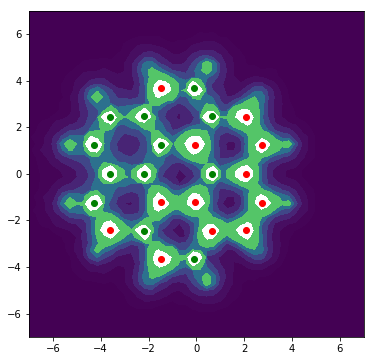

In [92]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(6,6))
levels = np.percentile(gridded, np.arange(0, 100, 8))
plt.contourf(grid_x, grid_y, gridded, levels=levels)
plt.scatter(coordinates[np.where(deltaZ > 0), 0], coordinates[np.where(deltaZ > 0), 2], color='red')
plt.scatter(coordinates[np.where(deltaZ < 0), 0], coordinates[np.where(deltaZ < 0), 2], color='green')